In [1]:
!pip install networkx matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving compras.txt to compras.txt


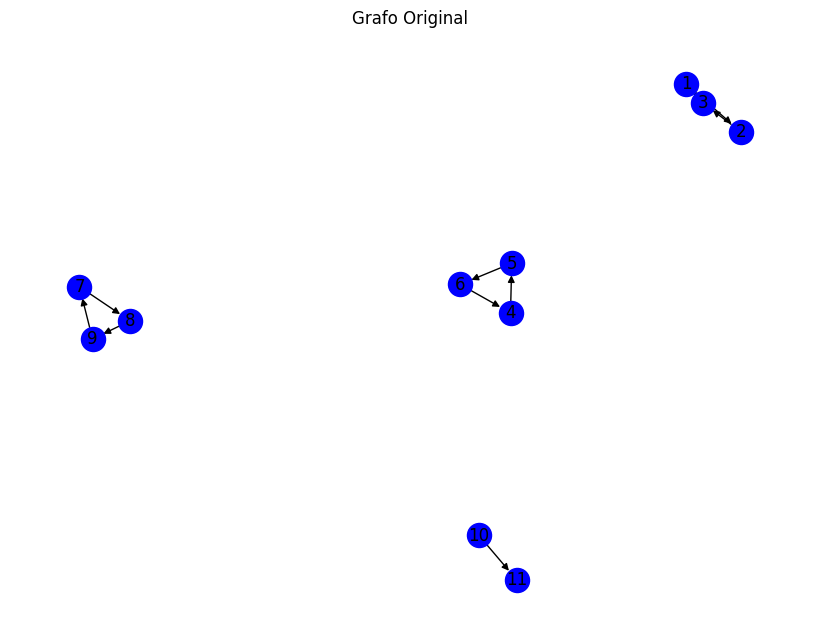

Recomendacion 0: [Producto 1, Producto 2, Producto 3]
Recomendacion 1: [Producto 7, Producto 8, Producto 9]
Recomendacion 2: [Producto 4, Producto 5, Producto 6]
Recomendacion 3: [Producto 11]
Recomendacion 4: [Producto 10]


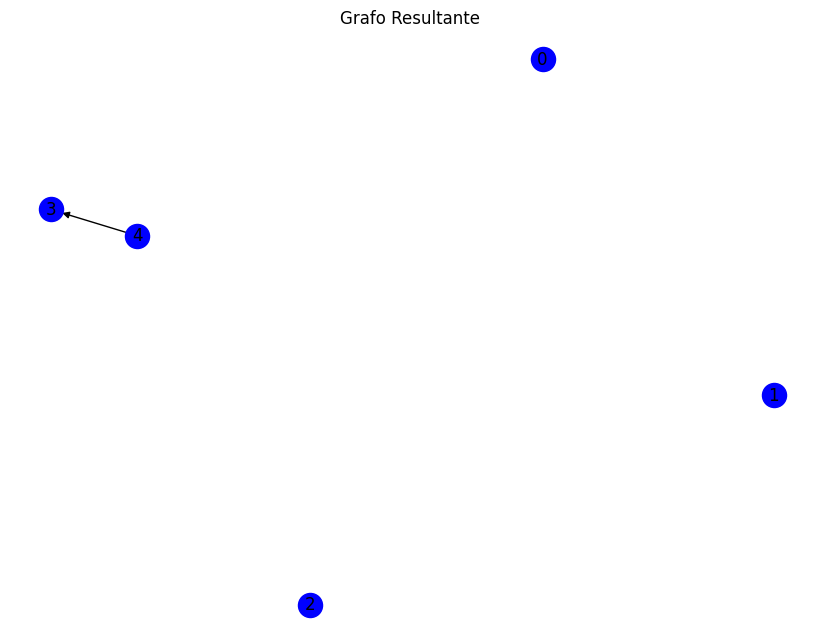

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import re

#Implementé un grafo dirigido utilizando la librería NetworkX.
#En este grafo, cada nodo representa un producto y cada arista simboliza
#una recomendación basada en compras. Para identificar grupos de productos,
#apliqué el algoritmo SCC. Este método es eficiente, con una complejidad de O(n+m).

def cargar_compras(archivo):
    relaciones = []
    with open(archivo, "r") as f:
        for linea in f:
            match = re.findall(r'\d+', linea)
            if match and len(match) == 2:
                origen, destino = match
                relaciones.append((int(origen), int(destino)))
    return relaciones

def construir_grafo(relaciones):
    G = nx.DiGraph()
    G.add_edges_from(relaciones)
    return G

def dibujar_grafo(G, titulo):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='blue', edge_color='black', arrows=True)
    plt.title(titulo)
    plt.show()

def agrupar_scc(G):
    scc = list(nx.strongly_connected_components(G))
    recomendaciones = {}
    for i, grupo in enumerate(scc):
        recomendaciones[f"Recomendacion {i}"] = sorted(list(grupo))
    return recomendaciones

def mostrar_recomendaciones(recomendaciones):
    for clave, productos in recomendaciones.items():
        nombres = ", ".join(f"Producto {p}" for p in productos)
        print(f"{clave}: [{nombres}]")

archivo = "compras.txt"
relaciones = cargar_compras(archivo)
grafo = construir_grafo(relaciones)

dibujar_grafo(grafo, "Grafo Original")

recomendaciones = agrupar_scc(grafo)
mostrar_recomendaciones(recomendaciones)

G_resultante = nx.condensation(grafo)
dibujar_grafo(G_resultante, "Grafo Resultante")